In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the csv file
df_1 = pd.read_csv('./international-arrival/total-visitor-international-arrivals-monthly.csv', names=['month', 'total_international_visitor_arrivals'], skiprows=409)
df_2 = pd.read_csv('./annual-tourism-receipts-by-major-components.csv', names=['period', 'components','tot_tr','trpce'])
df_3 = pd.read_csv('./international-arrival/visitor-international-arrivals-to-singapore-by-country-monthly.csv', names=['month','region','country','no_of_visitor_arrivals'])
df_4 = pd.read_csv('./international-arrival/visitor-international-arrivals-to-singapore-by-region-monthly.csv', names=['month','region','no_of_visitor_arrivals'])
df_5 = pd.read_csv('./international-arrival/international-visitor-arrivals-by-country-of-nationality.csv', names=['period', 'region', 'con', 'arv_count'])
df_6 = pd.read_csv('./hotel-related/overseas-visitors-survey-visitors-profile-data-accommodation.csv', names=['period', 'region', 'cor', 'hotel', 'friends_relatives', 'others'])
df_7 = pd.read_csv('./hotel-related/monthly-gazetted-hotels-statistics.csv', names=['period', 'max', 'paid', 'available', 'occupied', 'aor', 'rm_revenue', 'arr', 'revpar'])






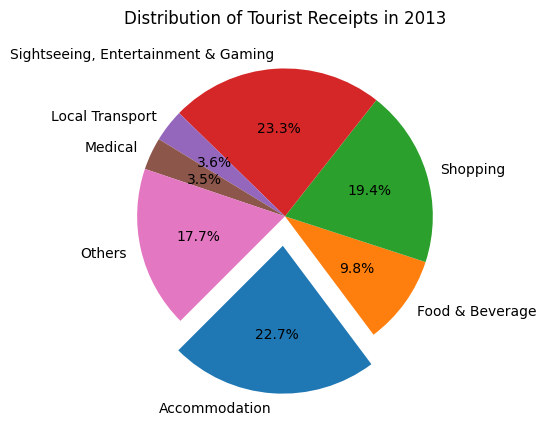

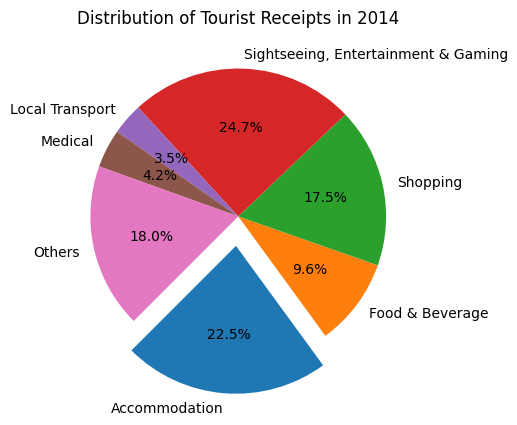

In [146]:
data_years = ['2013', '2014']


for i in range(len(data_years)):

    receipts = []
    components = []

    for index, row in df_2.iterrows():

        year = row['period']
        component = row['components']
        tourist_receipts = row['tot_tr']

        if year == data_years[i] and component != 'All Components':
            receipts.append(tourist_receipts)
            components.append(component)
    
    explode = [0.2, 0, 0, 0, 0, 0, 0]
    plt.pie(receipts, labels=components, autopct='%1.1f%%', startangle=225, explode=explode)
    plt.title('Distribution of Tourist Receipts in ' + data_years[i])
    plt.show()

    
    
        



          Avg Hotel Occupancy  Avg Friends and Relatives  Avg Others
Regions                                                             
Africa                  68.00                       6.00       26.00
Americas                69.50                      15.00       15.50
Asia                    64.36                      17.73       18.00
Europe                  68.17                      11.33       20.17
Oceania                 73.00                       8.50       19.00


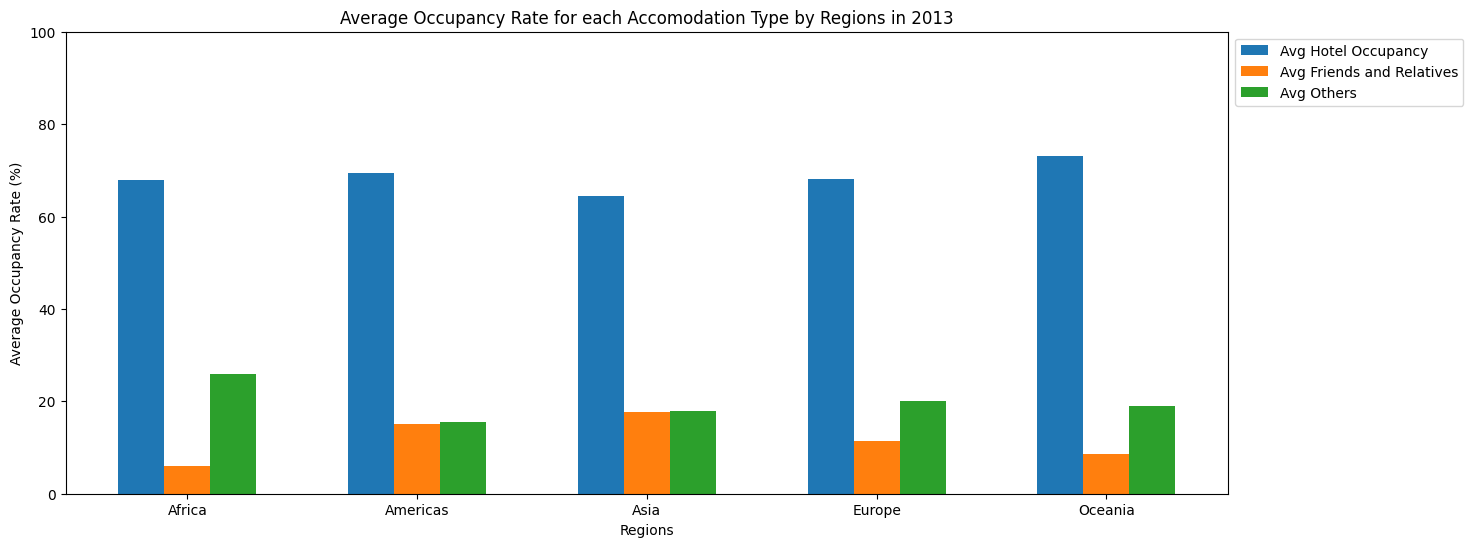

          Avg Hotel Occupancy  Avg Friends and Relatives  Avg Others
Regions                                                             
Africa                  56.00                       5.00       38.00
Americas                67.50                      15.50       17.50
Asia                    63.27                      19.82       17.00
Europe                  63.33                      13.83       22.67
Oceania                 73.50                      10.00       16.50


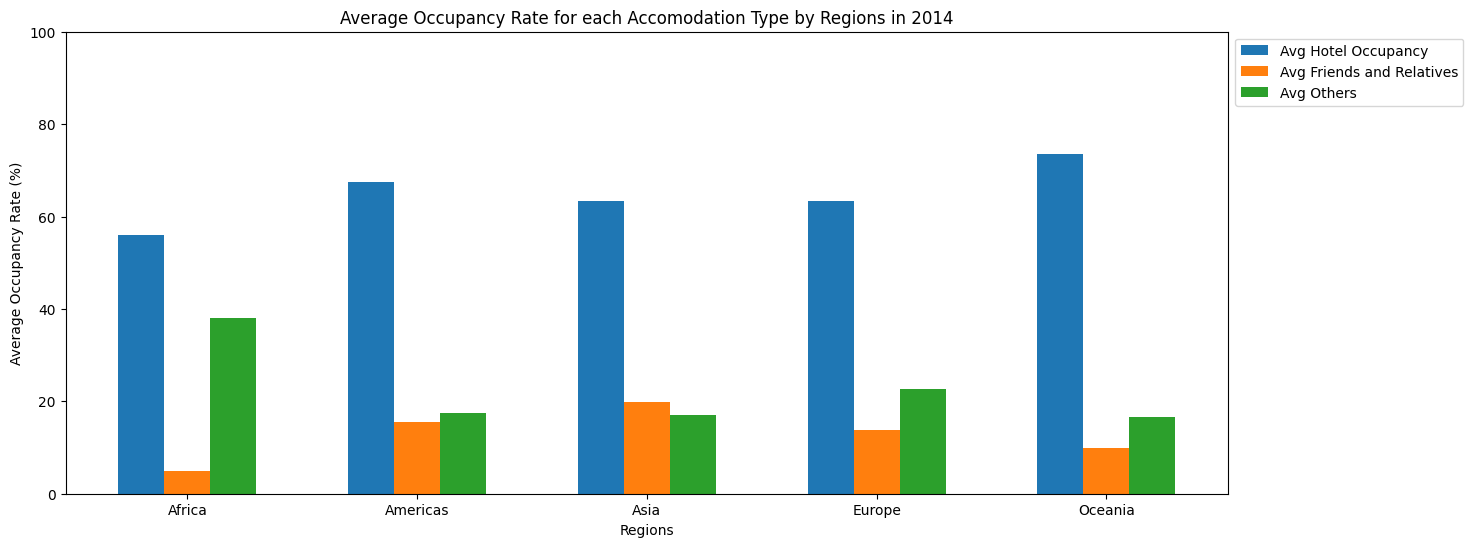

In [147]:
data_years = ['2013', '2014']


# Used to check for unique regions only
# unique_regions = df_6['region'].unique()
# print("Unique Regions:", unique_regions)

for i in range(len(data_years)):
    
    data = {}
    regions = []
    average_hotel_occupancy = []
    average_friends_relatives = []
    average_others = []
    
    for index, row in df_6.iterrows():

        # Convert 'hotel', 'friends_relatives', and 'others' columns to numeric data types
        row['hotel'] = pd.to_numeric(row['hotel'], errors='coerce')
        row['friends_relatives'] = pd.to_numeric(row['friends_relatives'], errors='coerce')
        row['others'] = pd.to_numeric(row['others'], errors='coerce')

        year = row['period']
        region = row['region']
        hotel = row['hotel']
        friends_relatives = row['friends_relatives']
        others = row['others']

        if year == data_years[i] and 'asia' in region.lower():
            region = 'Asia'
            
            regions.append(region)
            average_hotel_occupancy.append(hotel)
            average_friends_relatives.append(friends_relatives)
            average_others.append(others)

        elif year == data_years[i] and 'europe' in region.lower():
            region = 'Europe'

            regions.append(region)
            average_hotel_occupancy.append(hotel)
            average_friends_relatives.append(friends_relatives)
            average_others.append(others)
        
        elif year == data_years[i] and 'africa' in region.lower():
            region = 'Africa'

            regions.append(region)
            average_hotel_occupancy.append(hotel)
            average_friends_relatives.append(friends_relatives)
            average_others.append(others)
        
        elif year == data_years[i] and 'americas' in region.lower():
            region = 'Americas'

            regions.append(region)
            average_hotel_occupancy.append(hotel)
            average_friends_relatives.append(friends_relatives)
            average_others.append(others)
        
        elif year == data_years[i] and 'oceania' in region.lower():
            region  = 'Oceania'

            regions.append(region)
            average_hotel_occupancy.append(hotel)
            average_friends_relatives.append(friends_relatives)
            average_others.append(others)
        
    
    data['Regions'] = regions
    data['Avg Hotel Occupancy'] = average_hotel_occupancy
    data['Avg Friends and Relatives'] = average_friends_relatives
    data['Avg Others'] = average_others

    df = pd.DataFrame(data)

    grouped_mean = df.groupby('Regions').agg({
        'Avg Hotel Occupancy': 'mean',
        'Avg Friends and Relatives': 'mean',
        'Avg Others': 'mean'
    })

    print(grouped_mean.round(2))

    # Side-by-Side Bar Plot
    plt.figure(figsize=(15, 6))

    bar_width = 0.2
    index = range(len(grouped_mean))

    plt.bar(index, grouped_mean['Avg Hotel Occupancy'], bar_width, label='Avg Hotel Occupancy')
    plt.bar([i + bar_width for i in index], grouped_mean['Avg Friends and Relatives'], bar_width, label='Avg Friends and Relatives')
    plt.bar([i + 2 * bar_width for i in index], grouped_mean['Avg Others'], bar_width, label='Avg Others')


    plt.xlabel('Regions')
    plt.ylabel('Average Occupancy Rate (%)')
    plt.xticks([i + bar_width for i in index], grouped_mean.index)
    plt.legend()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('Average Occupancy Rate for each Accomodation Type by Regions in ' + data_years[i])
    # Set Y-axis limits to extend until 100
    plt.ylim(0, 100)
    plt.show()

    


            

            


    

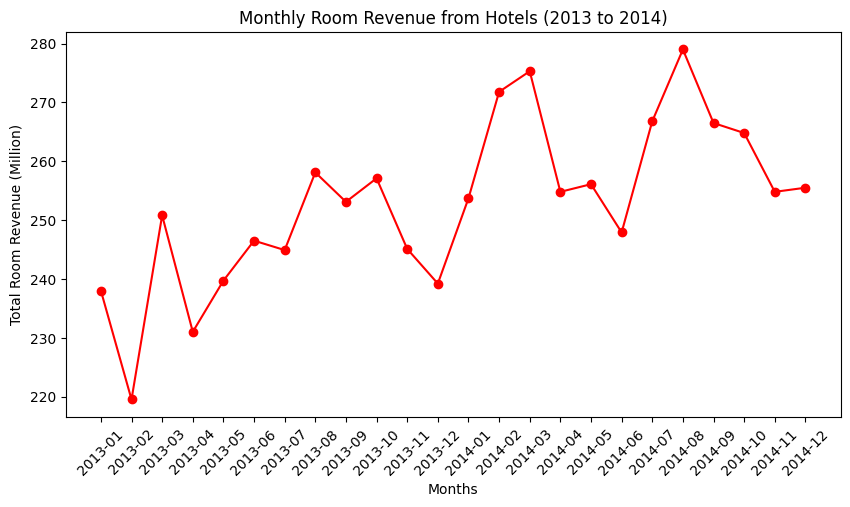

In [148]:
data_years = ['2013','2014']

x = []
y = []

for i in range(len(data_years)):

    for index, row in df_7.iterrows():

        month = row['period']
        total_room_revenue = pd.to_numeric(row['rm_revenue'], errors='coerce')

        if data_years[i] in month:
            x.append(month)
            y.append(total_room_revenue)
    
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='red', marker='o')
# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.title('Monthly Room Revenue from Hotels (2013 to 2014)')
plt.xlabel('Months')
plt.ylabel('Total Room Revenue (Million)')
plt.show()

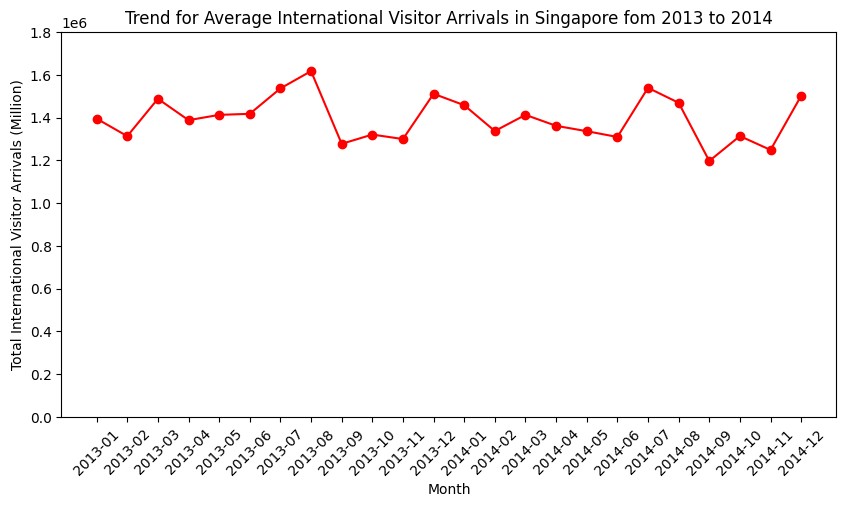

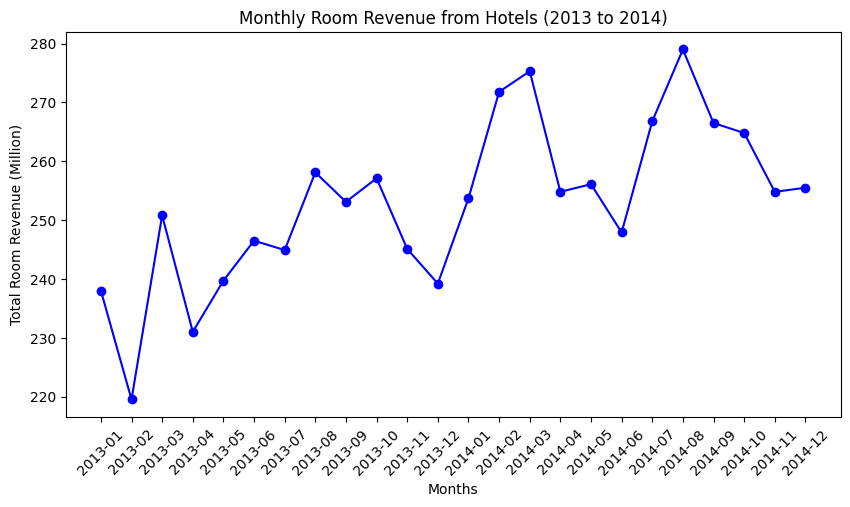

In [156]:
data_years = ['2013', '2014']


months_check = set()

data = {}

months = []
arrival_count = []

for i in range(len(data_years)):

    temp_value = 0

    # Loop through the DataFrame df_1 using iterrows()
    for index, row in df_1.iterrows():

        month = row['month']
        total_international_visitors = pd.to_numeric(row['total_international_visitor_arrivals'], errors='coerce')

        if data_years[i] in month:

            if month not in months_check:

                months_check.add(month)
                months.append(month)

                if temp_value != 0:
                    arrival_count.append(temp_value)
                    temp_value = total_international_visitors
                else:
                    temp_value = total_international_visitors 

            else:
                temp_value += total_international_visitors
    
    arrival_count.append(temp_value)
    months_check.clear()
    temp_value = 0
    

    # Loop through the DataFrame df_3 using iterrows()

    for index, row in df_3.iterrows():

        month = row['month']
        no_of_visitor_arrivals_df3 = pd.to_numeric(row['no_of_visitor_arrivals'], errors='coerce')

        if data_years[i] in month:

            if month not in months_check:

                
                months_check.add(month)
                months.append(month)

                if temp_value != 0:
                    arrival_count.append(temp_value)
                    temp_value = no_of_visitor_arrivals_df3
                else:
                    temp_value = no_of_visitor_arrivals_df3
                    
            else:
                temp_value += no_of_visitor_arrivals_df3

    arrival_count.append(temp_value)
    months_check.clear()
    temp_value = 0

    # Loop through the DataFrame df_4 using iterrows()
    for index, row in df_4.iterrows():

        month = row['month']
        no_of_tourist_arrivals_df4 = pd.to_numeric(row['no_of_visitor_arrivals'], errors='coerce')

        if data_years[i] in month:

            if month not in months_check:
                months_check.add(month)
                months.append(month)
                
                if temp_value != 0:
                    arrival_count.append(temp_value)
                    temp_value = no_of_tourist_arrivals_df4
                else:
                    temp_value = no_of_tourist_arrivals_df4

            else:
                temp_value += no_of_tourist_arrivals_df4

    arrival_count.append(temp_value)
    months_check.clear()
    temp_value = 0

    # Loop through the DataFrame df_5 using iterrows()
    for index, row in df_5.iterrows():
        month = row['period']
        arv_count_df5 = pd.to_numeric(row['arv_count'], errors='coerce')
        if data_years[i] in month:

            if month not in months_check:
                months_check.add(month)
                months.append(month)
                
                if temp_value != 0:
                    arrival_count.append(temp_value)
                    temp_value = arv_count_df5
                else:
                    temp_value = arv_count_df5
            else:
                temp_value += arv_count_df5
    
    arrival_count.append(temp_value)
    months_check.clear()




data['Months'] = months
data['Mean Arrival Count'] = arrival_count

df = pd.DataFrame(data)

grouped_mean = df.groupby('Months').agg({
    'Mean Arrival Count': 'mean'
})

grouped_mean_arrival_count = grouped_mean.round(0)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(grouped_mean_arrival_count.index, grouped_mean_arrival_count['Mean Arrival Count'], color='red', marker='o')
# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.title('Trend for Average International Visitor Arrivals in Singapore fom 2013 to 2014')
plt.xlabel('Month')
plt.ylabel('Total International Visitor Arrivals (Million)')
plt.ylim(0, 1800000)
plt.show()



x = []
y = []

for i in range(len(data_years)):

    for index, row in df_7.iterrows():

        month = row['period']
        total_room_revenue = pd.to_numeric(row['rm_revenue'], errors='coerce')

        if data_years[i] in month:
            x.append(month)
            y.append(total_room_revenue)
    
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='blue', marker='o')
# Tilt the x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.title('Monthly Room Revenue from Hotels (2013 to 2014)')
plt.xlabel('Months')
plt.ylabel('Total Room Revenue (Million)')
plt.show()

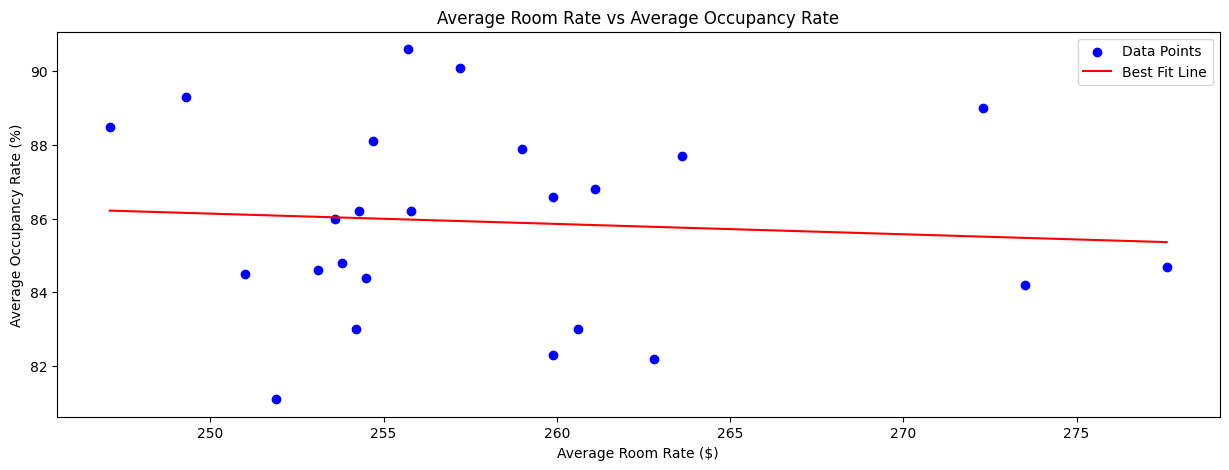

In [155]:
data_years = ['2013', '2014']

data = {}

average_room_rate = []
average_occupancy_rate = []

for i in range(len(data_years)):

    for index, row in df_7.iterrows():
        
        month = row['period']
        avg_room_rate = row['arr']
        avg_occupancy_rate = row['aor']

        if data_years[i] in month:
            average_room_rate.append(float(avg_room_rate))
            average_occupancy_rate.append(float(avg_occupancy_rate))


data['Average Room Rate'] = average_room_rate
data['Average Occupancy Rate'] = average_occupancy_rate

df = pd.DataFrame(data, columns=['Average Room Rate', 'Average Occupancy Rate'])


#Calculating the best fit line
x = df['Average Room Rate'].to_numpy()
y = df['Average Occupancy Rate'].to_numpy()

coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]

best_fit_line = np.poly1d(coefficients)
x_range = np.linspace(min(x), max(x), 100)

# Plotting the data
plt.figure(figsize=(15, 5))
plt.title('Average Room Rate vs Average Occupancy Rate')
plt.xlabel('Average Room Rate ($)')
plt.ylabel('Average Occupancy Rate (%)')

plt.scatter(df['Average Room Rate'], df['Average Occupancy Rate'], label='Data Points', color='blue')
plt.plot(x_range, best_fit_line(x_range), label='Best Fit Line', color='red')
plt.legend()
plt.show()